In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
con = sqlite3.connect('/content/drive/MyDrive/School21/d12/data/checking-logs.sqlite')

In [5]:
commits = pd.read_sql('''select timestamp from checker where status = 'ready' and uid like 'user_%' ''', con)

In [6]:
commits['timestamp'] = commits['timestamp'].astype('datetime64[ns]')

In [7]:
commits['dayofweek'] = pd.cut(commits.timestamp.dt.dayofweek, bins = [0,5,8], labels=['рабочие','выходные'], right=False)

In [8]:
commits['hour'] = commits.timestamp.dt.hour

In [9]:
commits

,timestamp,dayofweek,hour
0,2020-04-17 05:19:02.744528,рабочие,5
1,2020-04-17 05:22:45.549397,рабочие,5
2,2020-04-17 05:34:24.422370,рабочие,5
3,2020-04-17 05:43:27.773992,рабочие,5
4,2020-04-17 05:46:32.275104,рабочие,5
...,...,...,...
1681,2020-05-21 20:01:48.959966,рабочие,20
1682,2020-05-21 20:18:54.487900,рабочие,20
1683,2020-05-21 20:19:06.872761,рабочие,20
1684,2020-05-21 20:22:41.877806,рабочие,20


In [10]:
workd = commits[commits['dayofweek']=='рабочие'][['dayofweek','hour']]

In [11]:
workd.shape

(1059, 2)

In [12]:
weekend = commits[commits['dayofweek']=='выходные'][['dayofweek','hour']]

In [13]:
weekend.shape

(627, 2)

In [14]:
con.close()

(0.0, 24.0)

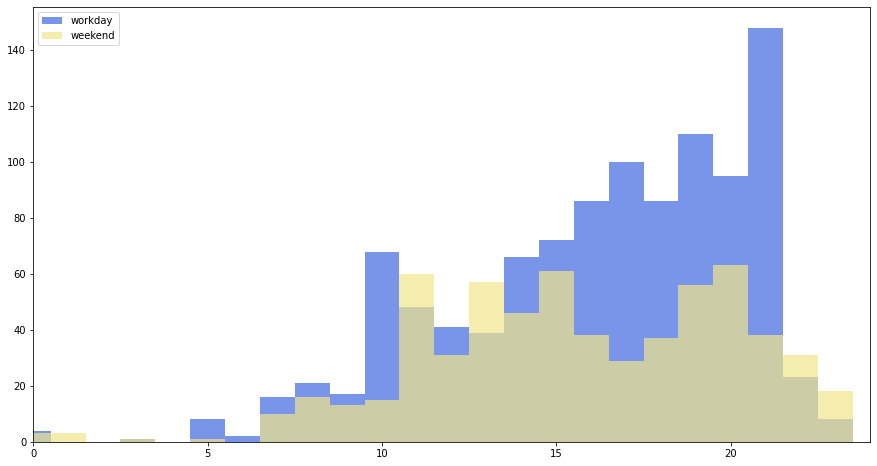

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(workd.groupby('hour').count().index, workd.groupby('hour').count()['dayofweek'], width = 1, alpha=.7, color = '#4169E1')
plt.bar(weekend.groupby('hour').count().index, weekend.groupby('hour').count()['dayofweek'], width = 1, alpha=.7, color = '#F0E68C')
plt.legend(['workday', 'weekend'], loc = 'upper left')
plt.xlim(0,24)

*Существуют ли часы, когда общее количество коммитов было выше в выходные дни, чем в рабочие?*
 
В своем ответе приведите примеры с 4 наибольшими значениями.

In [16]:
ans = pd.merge(workd.groupby('hour').count(), weekend.groupby('hour').count(), right_index=True, left_index=True)

In [17]:
ans.head()

,dayofweek_x,dayofweek_y
hour,,
0,4,3
3,1,1
5,8,1
7,16,10
8,21,16


In [18]:
ans[ans['dayofweek_x']<ans['dayofweek_y']]

,dayofweek_x,dayofweek_y
hour,,
11,48,60
13,39,57
22,23,31
23,8,18


### Ответ: 11, 13, 22, 23